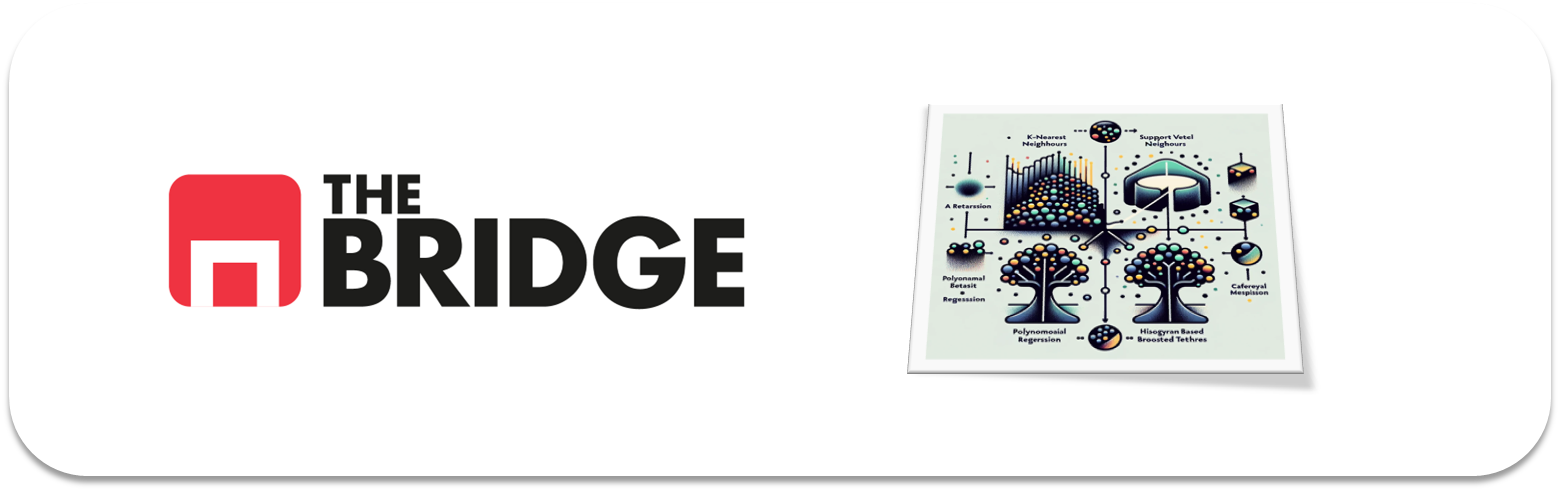

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (recall_score,
                             confusion_matrix,
                             mean_absolute_percentage_error,
                            mean_squared_error,
                            classification_report,
                            r2_score
                            )

from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor
                              )

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
from xgboost import XGBClassifier, XGBRegressor



In [75]:
# Settings
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
warnings.filterwarnings("ignore")

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedades y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [76]:
path = r"https://raw.githubusercontent.com/rodolso/DS_Online_Octubre24_Exercises/refs/heads/main/04_Machine_Learning/Sprint_12/Unidad_02/Practica_Obligatoria/data/wines_dataset.csv"
df = pd.read_csv(path, sep = "|")

In [77]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [79]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [80]:
target_clas = "quality"
target_reg = "alcohol"

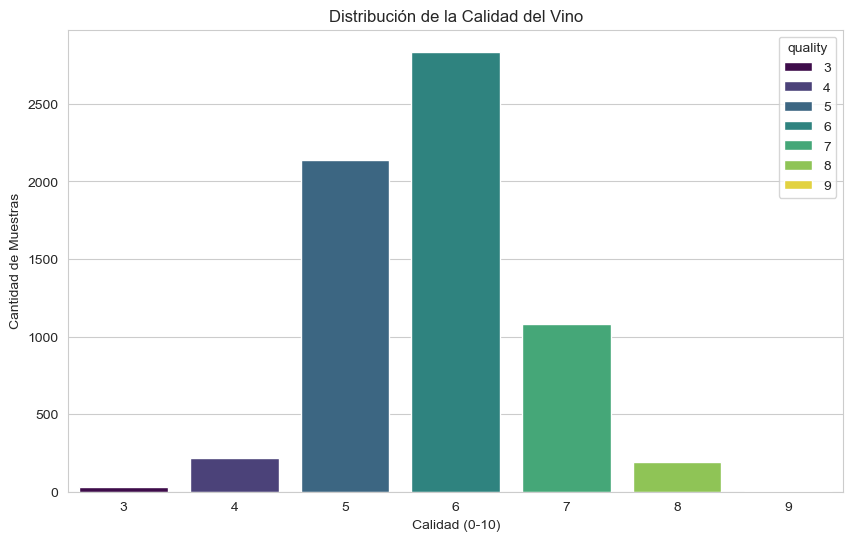


Distribución de la Calidad:
quality
3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: proportion, dtype: float64


In [81]:
# quality distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=target_clas, hue=target_clas, palette="viridis")
plt.title("Distribución de la Calidad del Vino")
plt.xlabel("Calidad (0-10)")
plt.ylabel("Cantidad de Muestras")
plt.show()

# Estadísticas descriptivas
print("\nDistribución de la Calidad:")
print(df[target_clas].value_counts(normalize=True).sort_index())

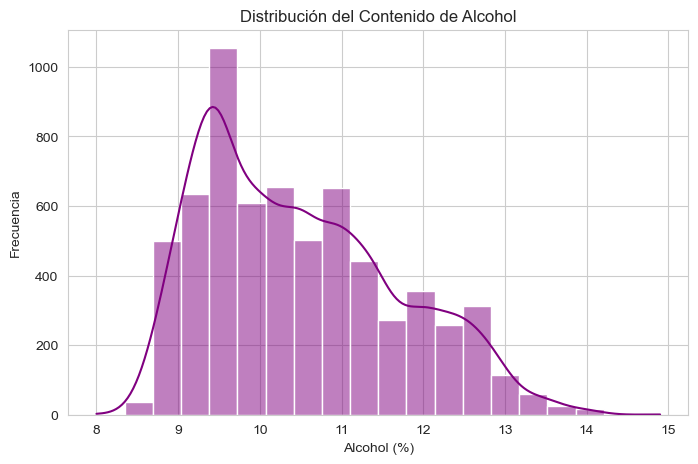


Estadísticas del Alcohol:
count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64


In [82]:
# Alcohol distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[target_reg], kde=True, color="purple", bins=20)
plt.title("Distribución del Contenido de Alcohol")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frecuencia")
plt.show()

print("\nEstadísticas del Alcohol:")
print(df[target_reg].describe())

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [83]:
# Label encoding
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

In [84]:
# Adjusting the target variable
original_classes = sorted(df["quality"].unique())
new_classes = list(range(len(original_classes)))
class_mapping = dict(zip(original_classes, new_classes))  # Ej: {3:0, 4:1, ..., 9:6}
df["quality_encoded"] = df["quality"].map(class_mapping)

In [85]:
# Divide the data into features and target
X_clas = df.drop(columns=["quality", "quality_encoded"])
y_clas = df["quality_encoded"]

In [86]:
# Standardize the features
scaler = StandardScaler()
X_clas_scaled = scaler.fit_transform(X_clas)

In [87]:
# Divide into training and test
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
    X_clas_scaled, y_clas, test_size=0.2, random_state=42, stratify=y_clas)

In [88]:
# Models and params for classification
models_class = [
    {
        "name": "KNN",
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5]}
    },
    {
        "name": "Random Forest",
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [100, 200]}
    },
    {
        "name": "XGBoost",
        "model": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
        "params": {"max_depth": [3, 5]}
    }
]

In [89]:
# Evaluate with GridSearchCV
best_model_class = None
best_score_class = 0

for model_info in models_class:
    print(f"\nEvaluating {model_info["name"]}...")
    grid_search = GridSearchCV(model_info["model"], model_info["params"],
                                cv=5, scoring="recall_macro")
    grid_search.fit(X_train_clas, y_train_clas)
    y_pred = grid_search.predict(X_test_clas)
    recall = recall_score(y_test_clas, y_pred, average="macro")
    print(f"Recall Macro (Test): {recall:.3f}")
    print(f"Best parameters: {grid_search.best_params_}")
    
    if recall > best_score_class:
        best_score_class = recall
        best_model_class = grid_search.best_estimator_




Evaluating KNN...
Recall Macro (Test): 0.267
Best parameters: {'n_neighbors': 3}

Evaluating Random Forest...
Recall Macro (Test): 0.358
Best parameters: {'n_estimators': 200}

Evaluating XGBoost...
Recall Macro (Test): 0.339
Best parameters: {'max_depth': 5}


In [90]:
# Best model metrics 
print(f"Best model: {best_model_class.__class__.__name__}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_clas, best_model_class.predict(X_test_clas)))
print("\nClassification repport:")
print(classification_report(y_test_clas, best_model_class.predict(X_test_clas)))

Best model: RandomForestClassifier
Confusion Matrix:
[[  0   0   3   3   0   0   0]
 [  0   5  23  15   0   0   0]
 [  0   1 318 105   4   0   0]
 [  0   0  76 455  36   0   0]
 [  0   0   5  99 111   1   0]
 [  0   0   0  16  10  13   0]
 [  0   0   0   1   0   0   0]]

Classification repport:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      0.12      0.20        43
           2       0.75      0.74      0.75       428
           3       0.66      0.80      0.72       567
           4       0.69      0.51      0.59       216
           5       0.93      0.33      0.49        39
           6       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.55      0.36      0.39      1300
weighted avg       0.70      0.69      0.68      1300



Error analysis

In [91]:
if isinstance(best_model_class, KNeighborsClassifier):
    print("- **KNN**: Verifica si el escalado de características es óptimo o prueba más vecinos.")
elif isinstance(best_model_class, RandomForestClassifier):
    print("- **Random Forest**: Ajusta 'max_depth' o 'min_samples_split' para reducir sobreajuste.")
elif isinstance(best_model_class, XGBClassifier):
    print("- **XGBoost**: Experimenta con 'learning_rate' o 'subsample' para mejorar generalización.")

- **Random Forest**: Ajusta 'max_depth' o 'min_samples_split' para reducir sobreajuste.


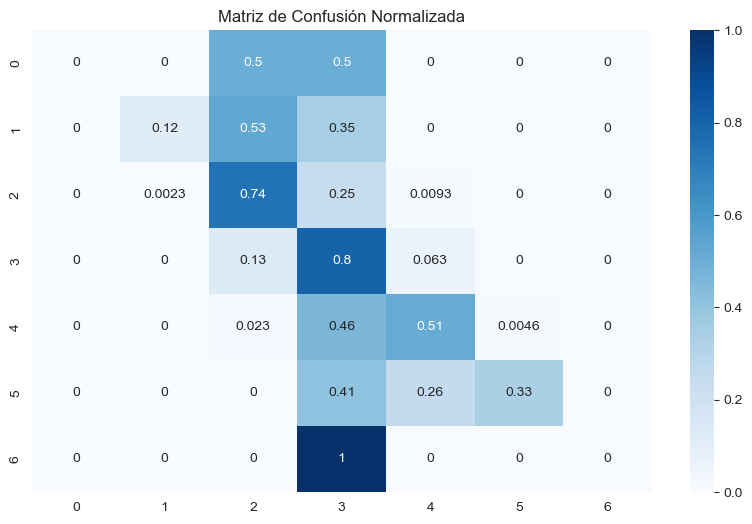

In [92]:
y_pred_clas = best_model_class.predict(X_test_clas)

conf_matrix = confusion_matrix(y_test_clas, y_pred_clas)
conf_matrix_normalized = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues")
plt.title("Matriz de Confusión Normalizada")
plt.show()

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [93]:
X_reg = df.drop(columns=["alcohol", "quality_encoded"])
y_reg = df["alcohol"]

In [95]:
# Scaling
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

In [96]:
# Divide into training and test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42)

In [97]:
# Models and params for regression
models_reg = [
    {
        "name": "Linear Regression",
        "model": LinearRegression(),
        "params": {"fit_intercept": [True, False]}
    },
    {
        "name": "Random Forest",
        "model": RandomForestRegressor(random_state=42),
        "params": {"n_estimators": [100, 200]}
    },
    {
        "name": "XGBoost",
        "model": XGBRegressor(),
        "params": {"max_depth": [3, 5]}
    }
]

In [98]:
# Evaluate with GridSearchCV
best_model_reg = None
best_mape_reg = float("inf")

for model_info in models_reg:
    print(f"\nEvaluating {model_info["name"]}...")
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring="neg_mean_absolute_percentage_error")
    grid_search.fit(X_train_reg, y_train_reg)
    y_pred = grid_search.predict(X_test_reg)
    mape = mean_absolute_percentage_error(y_test_reg, y_pred) * 100
    print(f"MAPE (Test): {mape:.2f}%")
    print(f"Best parameters: {grid_search.best_params_}")
    
    if mape < best_mape_reg:
        best_mape_reg = mape
        best_model_reg = grid_search.best_estimator_


Evaluating Linear Regression...
MAPE (Test): 3.42%
Best parameters: {'fit_intercept': True}

Evaluating Random Forest...
MAPE (Test): 2.49%
Best parameters: {'n_estimators': 200}

Evaluating XGBoost...
MAPE (Test): 2.59%
Best parameters: {'max_depth': 5}


In [99]:
# Metrics
print(f"Best model: {best_model_reg.__class__.__name__}")
print(f"MAPE (Test): {best_mape_reg:.2f}%")
print(f"RMSE (Test): {np.sqrt(mean_squared_error(y_test_reg, best_model_reg.predict(X_test_reg))):.3f}")
print(f"R² (Test): {r2_score(y_test_reg, best_model_reg.predict(X_test_reg)):.3f}")

Best model: RandomForestRegressor
MAPE (Test): 2.49%
RMSE (Test): 0.401
R² (Test): 0.886


Error analysis

In [100]:
# Error analysis
if isinstance(best_model_reg, LinearRegression):
    print("- **Linear Regression**: Valida supuestos (linealidad, homocedasticidad) o añade interacciones.")
elif isinstance(best_model_reg, RandomForestRegressor):
    print("- **Random Forest**: Analiza importancia de características o ajusta 'max_features'.")
elif isinstance(best_model_reg, XGBRegressor):
    print("- **XGBoost**: Prueba regularización con 'gamma' o 'reg_lambda'.")

print("\nRecomendaciones Comunes:")
print("- Feature engineering: Crear nuevas variables (ej: relación acidez/alcohol).")
print("- Balanceo de datos (clasificación): Aplicar SMOTE si hay clases minoritarias.")
print("- Ensamblar modelos: Combinar predicciones para reducir varianza (ej: VotingRegressor).")

- **Random Forest**: Analiza importancia de características o ajusta 'max_features'.

Recomendaciones Comunes:
- Feature engineering: Crear nuevas variables (ej: relación acidez/alcohol).
- Balanceo de datos (clasificación): Aplicar SMOTE si hay clases minoritarias.
- Ensamblar modelos: Combinar predicciones para reducir varianza (ej: VotingRegressor).


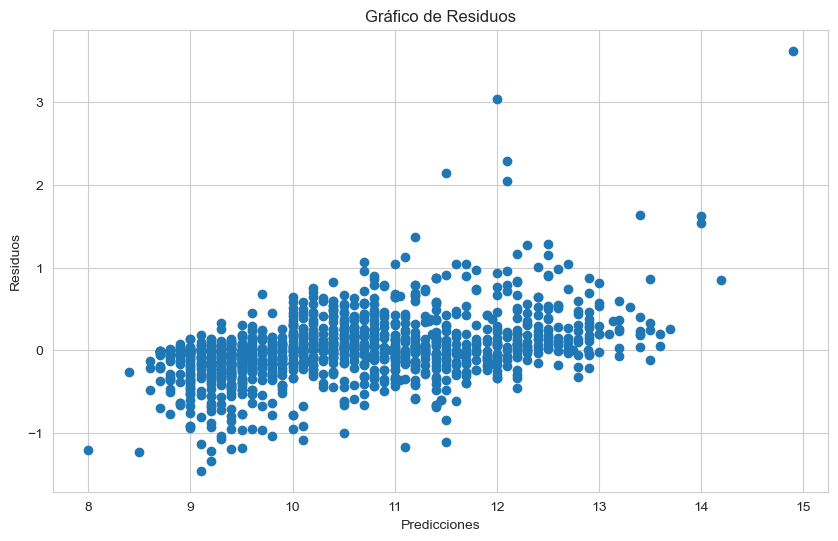

In [101]:
y_pred_reg = best_model_reg.predict(X_test_reg)

plt.scatter(y_test_reg, y_test_reg - y_pred_reg)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()